<a href="https://colab.research.google.com/github/JayabharathiRavi/D19_Task6_class/blob/main/Copy_of_Assignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment8

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [ ]:
from google.colab import files
files.upload()

In [ ]:
df = pd.read_csv("car_data.csv")

### **PART 1**


In [ ]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [ ]:
df.dtypes

Price       float64
Mileage       int64
Make         object
Model        object
Trim         object
Type         object
Cylinder      int64
Liter       float64
Doors         int64
Cruise        int64
Sound         int64
Leather       int64
dtype: object

In [ ]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

There is no null values.No need of encoding

In [ ]:
#linear equation for mileage vs price

## **EDA**

<function matplotlib.pyplot.show>

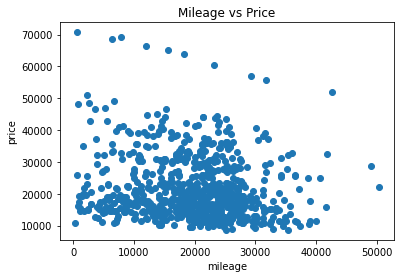

In [ ]:
x=df['Mileage']
y=df['Price']
plt.scatter(x,y)
plt.xlabel('mileage')
plt.ylabel('price')
plt.title('Mileage vs Price')
plt.show

In [ ]:
df[['Mileage','Price']].corr()

,Mileage,Price
Mileage,1.000000,-0.143051
Price,-0.143051,1.000000


There is low linear relation b/w mileage and price

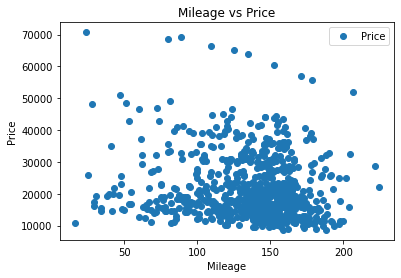

,transformed,Price
transformed,1.000000,-0.149316
Price,-0.149316,1.000000


In [ ]:
df['transformed'] = np.sqrt(df['Mileage'])
df.plot(x='transformed', y='Price', style='o')
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()
df[['transformed','Price']].corr()

It has low linear relationship b/w the data.

In [ ]:
df.dtypes

Price          float64
Mileage          int64
Make            object
Model           object
Trim            object
Type            object
Cylinder         int64
Liter          float64
Doors            int64
Cruise           int64
Sound            int64
Leather          int64
transformed    float64
dtype: object

In [ ]:
df['sqrt_mileage']  = np.sqrt(df['Mileage'])

In [ ]:
df.shape

(804, 14)

In [ ]:
y = df.iloc[:, 0]
y

0      17314.103129
1      17542.036083
2      16218.847862
3      16336.913140
4      16339.170324
           ...     
799    16507.070267
800    16175.957604
801    15731.132897
802    15118.893228
803    13585.636802
Name: Price, Length: 804, dtype: float64

In [ ]:
X = df.iloc[:, -1]
X

0       90.669730
1       95.577194
2      114.873844
3      127.835832
4      140.826134
          ...    
799    127.393092
800    138.184659
801    143.122325
802    161.180024
803    188.843851
Name: sqrt_mileage, Length: 804, dtype: float64

In [ ]:
X = df.iloc[:, -1].values 
y = df.iloc[:, 0].values 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 5)

In [ ]:
X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
scaler.fit(X_train) 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_,['Mileage'], columns=['Coefficient'])
y_pred = regressor.predict(X_test)
coeff_df

,Coefficient
Mileage,-1760.267032


In [ ]:
regressor.intercept_ # c 

array([21257.24104395])

In [ ]:
y_pred = regressor.predict(X_test) # given the features of the test dataset, it will give the final predictions

In [ ]:
y_pred

In [ ]:
y_test.shape,y_pred.shape

((161, 1), (161, 1))

In [ ]:
a=[]
for i in y_test:
  a.append(*i)
b=[]
for j in y_pred:
  b.append(*j)


In [ ]:
df = pd.DataFrame({'Actual': a, 'Predicted': b})
df

,Actual,Predicted
0,9506.047937,20627.846190
1,14429.789643,24368.549052
2,9919.048185,18660.969463
3,23249.841685,19702.014233
4,16927.779761,25620.741547
...,...,...
156,12425.389171,20521.601953
157,22525.269722,21113.287867
158,15047.002738,22636.524352
159,32422.761376,23434.896719


In [ ]:
regressor.intercept_,regressor.coef_

(array([21257.24104395]), array([[-1760.26703174]]))

Tasks, Part 1

1. Find the linear regression equation for mileage vs price.


> Price= 9882.02710656(sqrt_mileage)+21672.032798799195



In [ ]:
#Price= 9882.02710656(sqrt_mileage)+21672.032798799195

2. Chart the original data and the equation on the chart.

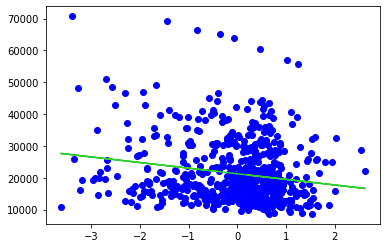

In [ ]:
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, regressor.predict(X_train), color='limegreen')

In [ ]:
df

3. Find the equation's R2 score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [ ]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: -0.02258249091611253


Not a good model choose some other algoritm

PART 2

In [ ]:
feature = ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']


,Cylinder,Price
Cylinder,1.000000,0.569086
Price,0.569086,1.000000


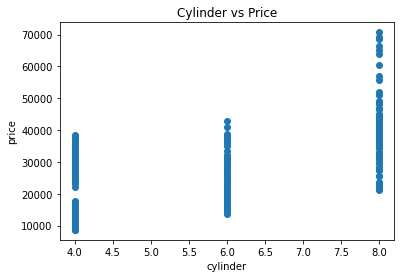

In [ ]:
x=df['Cylinder']
y=df['Price']
plt.scatter(x,y)
plt.xlabel('cylinder')
plt.ylabel('price')
plt.title('Cylinder vs Price')
plt.show
df[['Cylinder','Price']].corr()

There is a linear regression b/w datas.No transform needed

,Liter,Price
Liter,1.000000,0.558146
Price,0.558146,1.000000


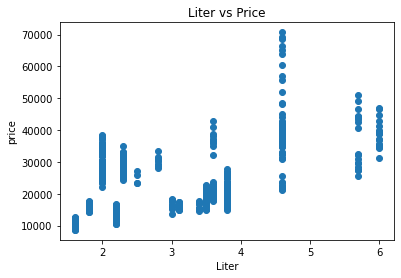

In [ ]:
x=df['Liter']
y=df['Price']
plt.scatter(x,y)
plt.xlabel('Liter')
plt.ylabel('price')
plt.title('Liter vs Price')
plt.show
df[['Liter','Price']].corr()

There is a linear regression b/w datas.No transform needed

,Doors,Price
Doors,1.00000,-0.13875
Price,-0.13875,1.00000


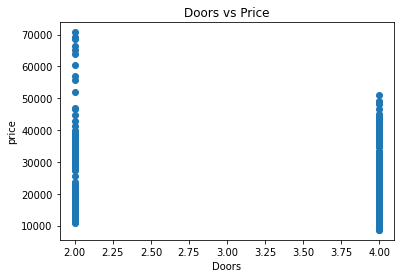

In [ ]:
x=df['Doors']
y=df['Price']
plt.scatter(x,y)
plt.xlabel('Doors')
plt.ylabel('price')
plt.title('Doors vs Price')
plt.show
df[['Doors','Price']].corr()

There is low linear relationship b/w datas

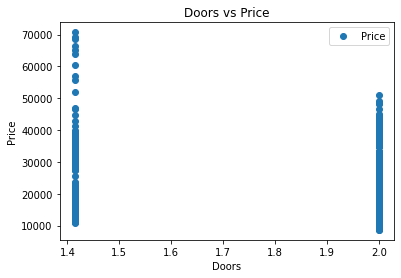

,transformed,Price
transformed,1.00000,-0.13875
Price,-0.13875,1.00000


In [ ]:
df['transformed'] = np.sqrt(df['Doors'])
df.plot(x='transformed', y='Price', style='o')
plt.title('Doors vs Price')
plt.xlabel('Doors')
plt.ylabel('Price')
plt.show()
df[['transformed','Price']].corr()

Every transformation gives the same corr

,Cruise,Price
Cruise,1.000000,0.430851
Price,0.430851,1.000000


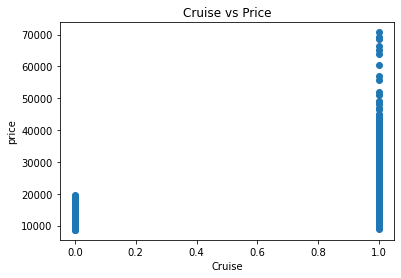

In [ ]:
x=df['Cruise']
y=df['Price']
plt.scatter(x,y)
plt.xlabel('Cruise')
plt.ylabel('price')
plt.title('Cruise vs Price')
plt.show
df[['Cruise','Price']].corr()

There is a high correlation.No transformation needed

,Sound,Price
Sound,1.000000,-0.124348
Price,-0.124348,1.000000


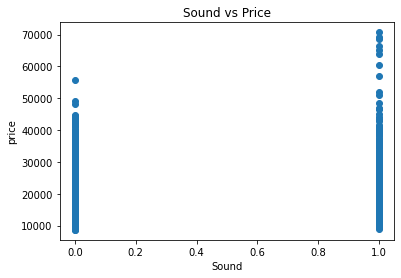

In [ ]:
x=df['Sound']
y=df['Price']
plt.scatter(x,y)
plt.xlabel('Sound')
plt.ylabel('price')
plt.title('Sound vs Price')
plt.show
df[['Sound','Price']].corr()

There is low linear relationship b/w datas

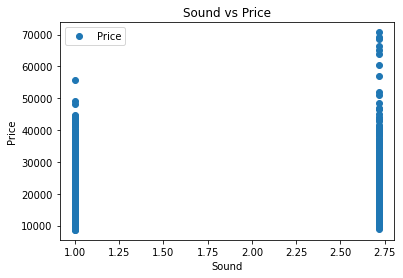

,transformed,Price
transformed,1.000000,-0.124348
Price,-0.124348,1.000000


In [ ]:
df['transformed'] = np.exp(df['Sound'])
df.plot(x='transformed', y='Price', style='o')
plt.title('Sound vs Price')
plt.xlabel('Sound')
plt.ylabel('Price')
plt.show()
df[['transformed','Price']].corr()

There is no change in corr during transform

,Leather,Price
Leather,1.000000,0.157197
Price,0.157197,1.000000


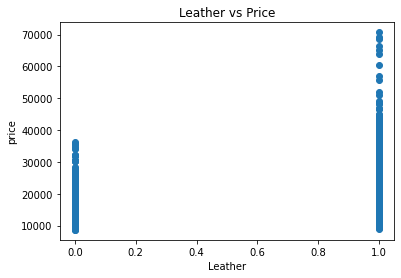

In [ ]:
x=df['Leather']
y=df['Price']
plt.scatter(x,y)
plt.xlabel('Leather')
plt.ylabel('price')
plt.title('Leather vs Price')
plt.show
df[['Leather','Price']].corr()

There is low linear relation b/w ddatas.Somewhat nearer to linear

In [ ]:
X = df[['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']].values 
y = df['Price'].values 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

In [ ]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaler.fit(X_train,y_train)
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test) 

In [ ]:
from sklearn.linear_model import LinearRegression
regressor1 = LinearRegression()
regressor1 .fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_,['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'], columns=['Coefficient'])
y_pred = regressor.predict(X_test_scaled)
coeff_df

,Coefficient
Mileage,-1371.001168
Cylinder,5362.757156
Liter,-636.102794
Doors,-1161.421897
Cruise,2605.283666
Sound,-1046.235630
Leather,1599.923922


In [ ]:
regressor1.coef_

array([-1372.21762489,  4360.04065747,  -106.15107895,  -861.43431768,
        2605.18799887,  -811.61769682,  1452.21276929])

In [ ]:
regressor1.intercept_

21505.23237703496

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.

In [ ]:
'''
Price = (-1372.21762489)Mileage+(4360.04065747)Cylinder+(-106.15107895)Liter+(-861.43431768)Doors+(2605.18799887)Cruise+
        (-811.61769682)Sound+(1452.21276929)Leather+21505.23237703496

'''

2. Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [ ]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.48943961471662345


3. Find the combination of the factors that is the best predictor for price.

In [ ]:
from sklearn.feature_selection import RFE
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_train_scaled, y_train)
list(zip(['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],selector.support_))

[('Mileage', False),
 ('Cylinder', True),
 ('Liter', False),
 ('Doors', False),
 ('Cruise', True),
 ('Sound', False),
 ('Leather', True)]

Leather,Cruise and Cylinder is the combination factors that is the best predictor for price

## **Tasks, Hard Mode**

Research dummy variables in scikit-learn to see how to use the make, model, and body type.

In [ ]:
df_with_dummies = pd.get_dummies(df, columns = ['Make', 'Model', 'Type'])


In [ ]:
columns = ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather', 'Make_Buick', 'Make_Chevrolet', 'Make_Pontiac', 'Make_SAAB', 'Make_Cadillac', 'Make_Saturn','Type_Sedan', 'Type_Coupe', 'Type_Wagon', 'Type_Hatchback', 'Type_Convertible']
X = df_with_dummies[columns]
y = df_with_dummies['Price']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

In [ ]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaler.fit(X_train,y_train)
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test) 

In [ ]:
from sklearn.linear_model import LinearRegression
regr= LinearRegression()
regr.fit(X, y)

LinearRegression()

In [ ]:
print('Intercept:', regr.intercept_)
print('Coefficient:',regr.coef_)
#print('Score:', regr.score(X, y))

Intercept: 6758.755143598106
Coefficient: [-1.69747832e-01  3.79237893e+03 -7.87220732e+02 -1.54274585e+03
  6.28899715e+03 -1.99379528e+03  3.34936162e+03]


Find the best combination of factors to predict price.

In [ ]:
import itertools
combos = []
for i in range(1, 11):
    combos.append(itertools.combinations(feature, i)) 

In [ ]:
from sklearn import linear_model, pipeline, preprocessing

In [ ]:
check_score = 0
for combin in combos:
    for groupx in combin:
        groupx = list(groupx)
        x = df[groupx]
        degrees = 8
        
        for degree in range(degrees):
            model = pipeline.Pipeline([
                    ('poly', preprocessing.PolynomialFeatures(degree=degree)),
                    ('linear', linear_model.LinearRegression(fit_intercept=False))])
            
            model = regr.fit(x,y)
            model_score = regr.score(x, y)
        if check_score < regr.score(x, y):
            check_score = regr.score(x, y)
            maxgroup = groupx
            best_degree = degree
            
print(degree, maxgroup, check_score)

7 ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'] 0.4462643536728379
